Input size is (1, 64, 64)


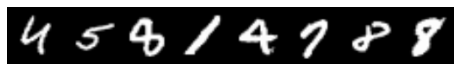

In [1]:
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
import torchvision.utils as vutils
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

img_size = 64
transform = transforms.Compose([transforms.Resize((img_size, img_size)),
                                transforms.ToTensor(), transforms.Normalize(mean=(0.5,), std=(0.5,))])
data = datasets.MNIST(root='./data',download=True, transform=transform)
img_shape = (data[1][0].size(0), data[1][0].size(1), data[1][0].size(2))
print(f'Input size is {img_shape}')

# Prepare dataloader for training
batch_size = 32
dataloader = DataLoader(data, batch_size=batch_size, shuffle=True, num_workers=4)

# Plot some training images
real_batch, _ = next(iter(dataloader))
plt.figure(figsize=(8,8))
plt.axis("off")
plt.imshow(np.transpose(vutils.make_grid(real_batch[:8], padding=2, normalize=True).cpu(),(1,2,0)))
plt.show()

In [2]:
# SAGAN training
from SAGAN_pytorch import *

z_dim = 128
lr = 0.0001
cuda = torch.cuda.is_available()
device = torch.device("cuda:0" if cuda else "cpu")

# Initialize generator and discriminator
G = Generator(img_shape=img_shape, z_dim=z_dim, conv_dim=64).to(device)
D = Discriminator(img_shape=img_shape, dim=64).to(device)

optimizer_G = torch.optim.Adam(G.parameters(), lr=lr, betas=(0.0, 0.99))
optimizer_D = torch.optim.Adam(D.parameters(), lr=lr, betas=(0.0, 0.99))

Train(epoch=10, dataloader=dataloader, device=device, z_dim=z_dim, G=G, D=D, 
      optimizer_G=optimizer_G, optimizer_D=optimizer_D, verbose=2)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch 2 / D loss: -3.0622 / G loss: 28.7307
Epoch 4 / D loss: -3.5920 / G loss: 20.8747
Epoch 6 / D loss: -2.4576 / G loss: 17.8218
Epoch 8 / D loss: -2.7236 / G loss: 11.7547
Epoch 10 / D loss: -3.0460 / G loss: 12.2429
